In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # True if GPU + CUDA is available

2.7.1+cu118
True


In [ ]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
urls = search_images('bird photos', max_images = 1)
urls[0]

RatelimitException: https://duckduckgo.com/i.js?l=wt-wt&o=json&q=bird+photos&vqd=4-112513009987784239604631045409544655571&f=%2C%2C%2C%2C%2C&p=1 403 Ratelimit

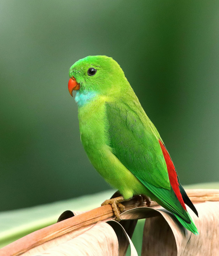

In [12]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [7]:
import torch

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "N/A")

Torch version: 2.7.1+cu118
CUDA available: True
GPU name: NVIDIA GeForce RTX 4070 Laptop GPU


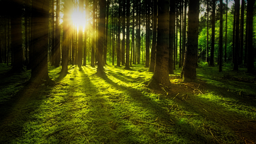

In [13]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [14]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [25]:
searches = 'alligator', 'crocodile'
path = Path('alligator_or_crocodile')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [27]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

24

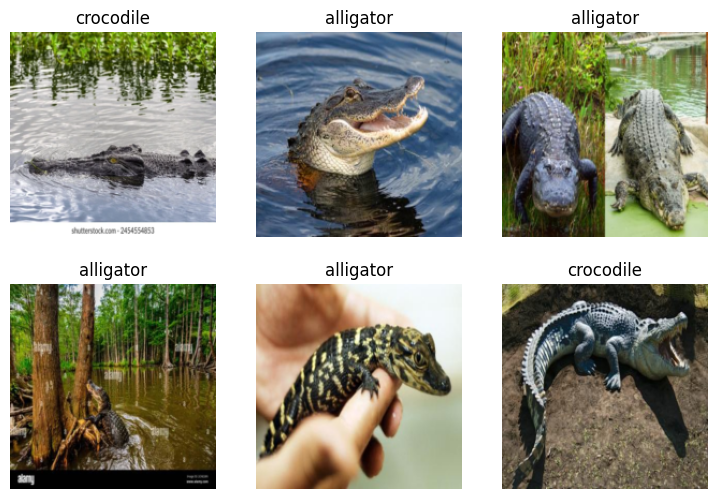

In [34]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed= 42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\huang/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100.0%


epoch,train_loss,valid_loss,error_rate,time
0,0.534341,0.353002,0.136986,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.087811,0.182851,0.054795,00:01
1,0.057493,0.132295,0.041096,00:01
2,0.040763,0.132658,0.041096,00:01


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: forest.
Probability it's a bird: 0.0000
